### 加载数据集
以 FashionMNIST数据集为例。 Fashion-MNIST 是 Zalando 的文章图像数据集，包含 60,000 个训练示例和 10,000 个测试示例。每个示例包含一个 28×28 灰度图像以及来自 10 个类别之一的相关标签。
我们使用以下参数加载 FashionMNIST 数据集

1.`root`是存储训练/测试数据的路径。<br>
2.`train` 指定训练或测试数据集。<br>
3.`download=True` 如果数据在 `root` 中不可用，则从互联网下载数据。<br>
4.`transform` 和 `target_transform` 指定特征和标签转换。


In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [6]:
training_data = datasets.FashionMNIST(
    root=r"D:\Github\learning-repository\assets\data", # 设置数据存储路径
    train=True,
    download=True,
    transform=ToTensor()
)

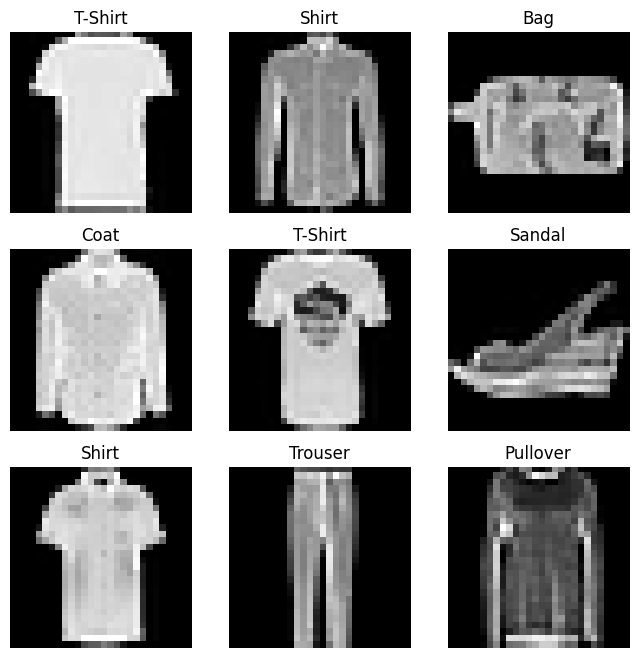

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols,rows = 3,3
for i in range(1,cols * rows +1):
    sample_index = torch.randint(len(training_data),size = (1,)).item()
    img, label = training_data[sample_index]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


### 创建自定义数据集
自定义Dataset类必须实现三个函数： \__init__、\__len__和\__getitem__。

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

### 使用 DataLoaders 准备数据以进行训练
`Dataset` 一次检索我们数据集的特征和标签一个样本。在训练模型时，我们通常希望以“小批量”传递样本，在每个 epoch 重新打乱数据以减少模型过拟合，并使用 Python 的 `multiprocessing` 来加速数据检索。

`DataLoader` 是一个可迭代对象，它以简单的 API 为我们抽象了这种复杂性。

In [7]:
from torch.utils.data import DataLoader

training_dataloader  = DataLoader(training_data, batch_size=64,shuffle=True)


#### 迭代DataLoader
我们已将数据集加载到 `DataLoader` 中，并且可以根据需要迭代数据集。下面的每次迭代都返回一批 `train_features` 和 `train_labels`（分别包含 `batch_size`=64 个特征和标签）。因为我们指定了 `shuffle=True`，所以在我们迭代完所有批次后，数据将被打乱。

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


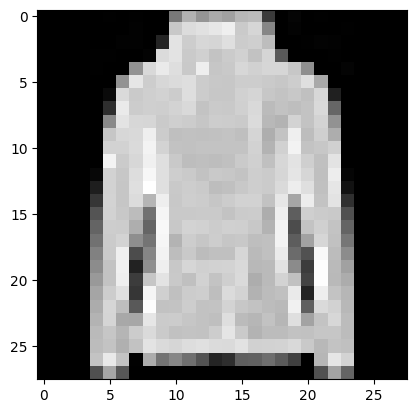

Label: Coat


In [17]:
train_features, train_labels = next(iter(training_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0].item()
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_map[label]}")